# pre-night (20-06-18)

**Goals:**  
None today, just check the sleep data.

# post-night  (20-06-19)

## problems

* no motivation to add dream report during the night, even though I woke up.
* sequence of sleep stages looks a little bit strange

## data analyses

In [42]:
%matplotlib notebook

# import the python functions
import sys
sys.path.insert(1, '../')
from python_functions import *

new


In [43]:
# manually add the time points of dream report onsets
report_times = [
    [False,8,13,44],
]

# read in data
df = pd.read_excel('raw_data.xlsx')

In [44]:
[state_onsets, depths_succ] = read_raw_data(df)

# manually add the time i went to bed / lights off (from note app and phone)
# make sure that if this is later than smartwatch-detected onset, get the later onset
lights_off_time = datetime.datetime.strptime("20/06/2020 23:37:0", '%d/%m/%Y %H:%M:%S')
if lights_off_time < state_onsets[0]:
    state_onsets = [lights_off_time] + state_onsets
elif lights_off_time > state_onsets[0]:
    ind = 0
    while lights_off_time > state_onsets[ind]:
        ind += 1
    state_onsets = state_onsets[ind-1:]
    depths_succ  = depths_succ[ind-1:]
    state_onsets = [lights_off_time] + state_onsets
    state_onsets[1] = lights_off_time
depths_succ = [0] + depths_succ

# get the time points of dream report onsets
dts_reports = []
for rt in report_times:
    dt_object = get_datetime(*rt)
    date = matplotlib.dates.date2num(dt_object)
    dts_reports.append(date)

<IPython.core.display.Javascript object>


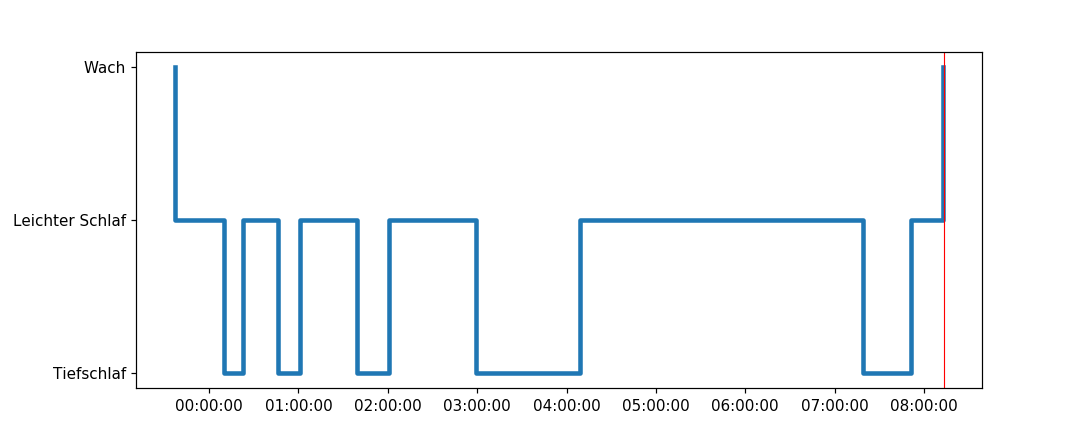

In [45]:
# put together hypnogram plot
ax = get_ax(state_onsets, depths_succ)
for dtr in dts_reports:
    plt.axvline(x=dtr, c="red", linewidth=0.75)

## what i've learned

nothing

## try sometime next:

* mean of emotions as expressions on face (a way to aggregate emotional data in a rather low-dimensional, quantifiable way)
* EEG measurement: show spectral data is an Voss' LD-tACS study (2014) on top of the smart-watch-based time series
* naive way: add triggers "you are dreaming" into the pink noise audio stream